# Representação

In [1]:
import random
import itertools

import pandas as pd
import numpy as np
import chess
import chess.pgn
import chess.svg
from math import ceil

import keras
from numpy.random                import seed
from tensorflow                  import set_random_seed
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models                import Sequential
from keras.layers                import Dense, Activation, Dropout

import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

Using TensorFlow backend.


## Carregando PGN

Carregando histórico de jogos do Kasparov:

In [18]:
pgn   = open("games/Kasparov.pgn")
games = list()
F = True
while F == True:
    try:
        g = chess.pgn.read_game(pgn)
        if len(games) > 0:
            if g != games[-1]:
                games.append(g)
            else:
                F = False
        else:
            games.append(g)
    except UnicodeDecodeError:
        F = False

In [19]:
pgn   = open("games/Anand.pgn")
F = True
while F == True:
    try:
        g = chess.pgn.read_game(pgn)
        if len(games) > 0:
            if g != games[-1]:
                games.append(g)
            else:
                F = False
        else:
            games.append(g)
    except UnicodeDecodeError:
        F = False

In [20]:
pgn   = open("games/Fischer.pgn")
F = True
while F == True:
    try:
        g = chess.pgn.read_game(pgn)
        if len(games) > 0:
            if g != games[-1]:
                games.append(g)
            else:
                F = False
        else:
            games.append(g)
    except UnicodeDecodeError:
        F = False

In [21]:
pgn   = open("games/Finegold.pgn")
F = True
while F == True:
    try:
        g = chess.pgn.read_game(pgn)
        if len(games) > 0:
            if g != games[-1]:
                games.append(g)
            else:
                F = False
        else:
            games.append(g)
    except UnicodeDecodeError:
        F = False

In [22]:
pgn   = open("games/Carlsen.pgn")
F = True
while F == True:
    try:
        g = chess.pgn.read_game(pgn)
        if len(games) > 0:
            if g != games[-1]:
                games.append(g)
            else:
                F = False
        else:
            games.append(g)
    except UnicodeDecodeError:
        F = False

In [23]:
pgn   = open("games/Caruana.pgn")
F = True
while F == True:
    try:
        g = chess.pgn.read_game(pgn)
        if len(games) > 0:
            if g != games[-1]:
                games.append(g)
            else:
                F = False
        else:
            games.append(g)
    except UnicodeDecodeError:
        F = False

In [24]:
pgn   = open("games/PolgarJ.pgn")
F = True
while F == True:
    try:
        g = chess.pgn.read_game(pgn)
        if len(games) > 0:
            if g != games[-1]:
                games.append(g)
            else:
                F = False
        else:
            games.append(g)
    except UnicodeDecodeError:
        F = False

In [38]:
black = [i for i in games if i is not None]
black = [i for i in black if ('Kasparov' in i.headers['Black']
                             or 'Anand' in i.headers['Black']
                             or 'Carlsen' in i.headers['Black']
                             or 'Caruana' in i.headers['Black']
                             or 'Finegold' in i.headers['Black']
                             or 'Fischer' in i.headers['Black']
                             or 'Polgar' in i.headers['Black'])]
#white = [i for i in games if 'Kasparov' in i.headers['White']]

print('B: ', len(black))
#print('W: ', len(white))

B:  6716


Exemplo de jogo do Kasparov saindo de negras:

In [41]:
sampleb = random.choice(black)

In [42]:
print(sampleb)

[Event "Corus"]
[Site "Wijk aan Zee NED"]
[Date "2001.01.16"]
[Round "3"]
[White "Kasparov,G"]
[Black "Anand,V"]
[Result "1/2-1/2"]
[BlackElo "2790"]
[ECO "C78"]
[WhiteElo "2849"]

1. e4 e5 2. Nf3 Nc6 3. Bb5 a6 4. Ba4 Nf6 5. O-O Bc5 6. c3 b5 7. Bb3 d6 8. a4 Bg4 9. h3 Bxf3 10. Qxf3 O-O 11. a5 Rb8 12. d3 Nd7 13. Be3 Kh8 14. Nd2 Ne7 15. Bc2 Bxe3 16. fxe3 c5 17. Bb3 c4 18. dxc4 Nc5 19. cxb5 Nxb3 20. Nxb3 Rxb5 21. Qd1 Qc7 22. Ra4 Nc6 23. Nd2 Nxa5 24. b4 Nb7 25. Qc2 h6 26. Qd3 Rb6 27. Rfa1 Rc6 28. R1a3 a5 29. Kh2 d5 30. Qb5 d4 31. bxa5 dxc3 32. Nb3 Nc5 33. Rc4 Rb8 34. Qxc6 Qxc6 35. Nxc5 Qb5 36. Rcxc3 Qe2 37. Nd7 Rb2 1/2-1/2


Iterando sobre os movimentos:

     1. e4   True
    1...e5  False
    2. Nf3   True
   2...Nc6  False
    3. Bb5   True
    3...a6  False
    4. Ba4   True
   4...Nf6  False
    5. O-O   True
   5...Bc5  False
     6. c3   True
    6...b5  False
    7. Bb3   True
    7...d6  False
     8. a4   True
   8...Bg4  False
     9. h3   True
  9...Bxf3  False
  10. Qxf3   True
  10...O-O  False
    11. a5   True
  11...Rb8  False
    12. d3   True
  12...Nd7  False
   13. Be3   True
  13...Kh8  False
   14. Nd2   True
  14...Ne7  False
   15. Bc2   True
 15...Bxe3  False
  16. fxe3   True
   16...c5  False
   17. Bb3   True
   17...c4  False
  18. dxc4   True
  18...Nc5  False
  19. cxb5   True
 19...Nxb3  False
  20. Nxb3   True
 20...Rxb5  False
   21. Qd1   True
  21...Qc7  False
   22. Ra4   True
  22...Nc6  False
   23. Nd2   True
 23...Nxa5  False
    24. b4   True
  24...Nb7  False
   25. Qc2   True
   25...h6  False
   26. Qd3   True
  26...Rb6  False
  27. Rfa1   True
  27...Rc6  False
  28. R1a3   True
   28...a5

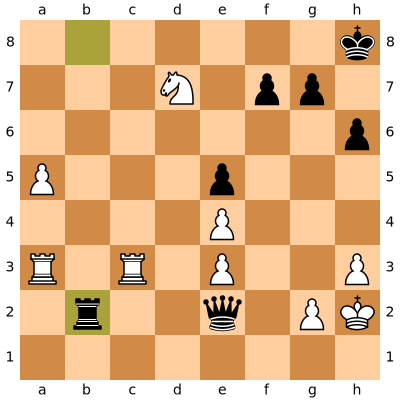

In [43]:
board = sampleb.board()
for m in sampleb.mainline_moves():
    print('{:>10} {:>6}'.format( board.variation_san([m]),
                                 str(board.turn)))
    board.push(m)
board

## Tratamentos

`symbol2value` recebe a representação de string das peças - brancas em _uppercase_ - e converte para inteiro. `list2piece` recebe a representação em inteiro e converte para a representação da peça segundo a biblioteca `chess`.

In [44]:
DICT1 = {'p':-60,'r':-50,'n':-40,'b':-30,'q':-20,'k':-10,'.':0,'K':10,'Q':20,'B':30,'N':40,'R':50,'P':60}
DICT2 = {-60:(chess.PAWN, chess.BLACK),
         -50:(chess.ROOK, chess.BLACK), 
         -40:(chess.KNIGHT, chess.BLACK), 
         -30:(chess.BISHOP, chess.BLACK), 
         -20:(chess.QUEEN, chess.BLACK), 
         -10:(chess.KING, chess.BLACK),
          0:'.',
         10:(chess.KING, chess.WHITE),
         20:(chess.QUEEN, chess.WHITE),
         30:(chess.BISHOP, chess.WHITE),
         40:(chess.KNIGHT, chess.WHITE),
         50:(chess.ROOK, chess.WHITE),
         60:(chess.PAWN, chess.WHITE)}

def symbol2value(list):
    for i, v in enumerate(list):
        if v in DICT1:
            list[i] = DICT1[v]
    return list


def list2piece(list):
    for i, v in enumerate(list):
        if v in DICT2:
            list[i] = DICT2[v]
    return list


def ceil_to_tens(x):
    return int(ceil(x / 10.0)) * 10

Abaixo `game2list` recebe um jogo pgn - ou seja, uma variável da classe pgn, e não um arquivo pgn -, a variável de cor da biblioteca `chess` e retorna uma lista de estados imediatamente anteriores ao movimento feito pela peça da cor selecionada, seguindo a seguinte estrutura:

```
matrix = [ estado_0, estado_1, ... , estado_n ]
      -> estado_i = [int_0, int_1, ..., int_63, int_moved_piece, int_moved_from, int_moved_to]
```

onde $int_0 = \text{a1}$, $int_1 = \text{b1}$, $\dots$, $int_{63} = \text{h8}$, estão **associadas** às casas do tabuleiro, todas **representadas** como inteiros de acordo com o mapeamento da `symbol2value`. 

Por exemplo no jogo do [exemplo acima](#Carregando-PGN), estudando o jogo das negras: o "`estado_1`", correspondente ao segundo estado do tabuleiro, teria "`estado_1[50] = -10`", representando o rei das peças negras na casa e8. 

As três últimas variáveis, `int_moved_piece`, `int_moved_from` e `int_moved_to` representam o movimento feito pela cor estudada. Nesse caso

```
1. e4  c5
```

"`estado_1[[64, 65, 66]] =  [-60, 50, 34]`", representando a resposta das peças negras ao primeiro estado do tabuleiro, um movimento de peão de c7 para c5.

Essa tripla fará papel de variável resposta do modelo de rede neural.

In [46]:
def game2list(g, color):
    matrix = list()
    board  = g.board()
    for m in g.mainline_moves():
        if board.turn == color:
            s = str(board)
            #state  = list( itertools.chain.from_iterable( [i.split() for i in s.split('\n')] ) )
            state  = [str(board.piece_at(i)) if board.piece_at(i) != None else '.' for i in range(64) ]
            target = [ str(board.piece_at(m.from_square)), m.from_square, m.to_square ]
            matrix.append( symbol2value(state + target) )
        board.push(m)
    return matrix

## Dataframe

Convertendo apenas respostas das peças negras para dataframe:

In [47]:
blackmoves = list()

for i in black:
    blackmoves += game2list(i, chess.BLACK)

In [48]:
blackmoves = pd.Series(blackmoves)
df =  pd.DataFrame.from_items(zip(blackmoves.index, blackmoves.values)).T
df.columns = [str(i) for i in range(67)]

In [49]:
df.shape

(281038, 67)

Definindo conjuntos de treino e teste:

In [50]:
X_train = df.drop(['64','65', '66'], axis=1)
y_train = df[['64','65', '66']]
X_test  = df.drop(['64','65', '66'], axis=1)

## Modelo

In [51]:
def net(train):
    seed(23)
    set_random_seed(23)
    
    model = Sequential()
    
    model.add(Dense(64, 
                    input_dim  = train.shape[1], 
                    activation = 'linear'))    
    #model.add(Dropout(0.05))
    model.add(Dense(64, activation = 'linear'))
    model.add(Dense(64, activation = 'linear'))
    #model.add(Dense(64, activation = keras.layers.ELU(alpha=1.13)))
    model.add(Dense(64, activation = 'linear'))
    model.add(Dense(32, activation = 'linear'))
    model.add(Dense(3))
    
    model.compile(loss = 'mean_squared_error', 
                  optimizer='Adadelta', 
                  metrics=['mse', 'accuracy'])
    
    return model

## Treino e Teste

In [52]:
model = net(X_train)
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 99        
Total params: 18,819
Trainable params: 18,819
Non-trainable params: 0
_________________________________________________________________
None


In [53]:
training = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.3, verbose=2)

Train on 196726 samples, validate on 84312 samples
Epoch 1/25
 - 10s - loss: 239.9168 - mean_squared_error: 239.9168 - acc: 0.7514 - val_loss: 214.5808 - val_mean_squared_error: 214.5808 - val_acc: 0.7419
Epoch 2/25
 - 9s - loss: 206.3114 - mean_squared_error: 206.3114 - acc: 0.7593 - val_loss: 212.9503 - val_mean_squared_error: 212.9503 - val_acc: 0.7441
Epoch 3/25
 - 9s - loss: 204.8669 - mean_squared_error: 204.8669 - acc: 0.7593 - val_loss: 211.1920 - val_mean_squared_error: 211.1920 - val_acc: 0.7441
Epoch 4/25
 - 9s - loss: 204.1528 - mean_squared_error: 204.1528 - acc: 0.7591 - val_loss: 208.8233 - val_mean_squared_error: 208.8233 - val_acc: 0.7441
Epoch 5/25
 - 9s - loss: 203.8274 - mean_squared_error: 203.8274 - acc: 0.7594 - val_loss: 211.2099 - val_mean_squared_error: 211.2099 - val_acc: 0.7407
Epoch 6/25
 - 9s - loss: 203.5945 - mean_squared_error: 203.5945 - acc: 0.7593 - val_loss: 208.9509 - val_mean_squared_error: 208.9509 - val_acc: 0.7440
Epoch 7/25
 - 9s - loss: 203.4


val_acc: 74.32%


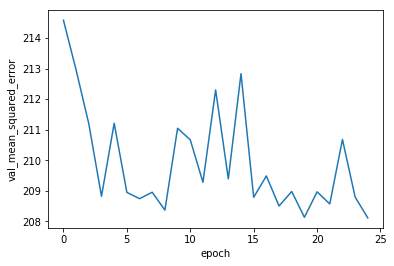

In [54]:
val_acc = np.mean(training.history['val_acc'])
print("\n%s: %.2f%%" % ('val_acc', val_acc*100))

fig = plt.figure()
fig.patch.set_facecolor('white')
#plt.plot(training.history['acc'])
#plt.plot(training.history['val_acc'])
plt.plot(training.history['val_mean_squared_error'])
#plt.title('model accuracy')
#plt.ylabel('accuracy')
plt.ylabel('val_mean_squared_error')
plt.xlabel('epoch');
#plt.legend(['train', 'validation'], loc='lower right')

In [55]:
def drawPredTrain(t, a):
    tstate = list2piece( t.values.tolist()[0] )
    pred  = model.predict(t).round().tolist()[0]
    pred = [ceil_to_tens(pred[0]), int(pred[1]), int(pred[2])]
    arrow = chess.svg.Arrow(tail = pred[1], 
                            head = pred[2])
    arrowans = chess.svg.Arrow(tail = a['65'].values[0], 
                            head = a['66'].values[0],
                              color='#f00')
    tboard = chess.Board()
    tboard.clear_board()
    for i,v in enumerate(tstate):
        if v != '.':
            tboard.set_piece_at(i, chess.Piece(v[0], v[1]))
            
    display( chess.svg.board(board = tboard, arrows=[arrow, arrowans], size=400) )
    
    return pred
    
    

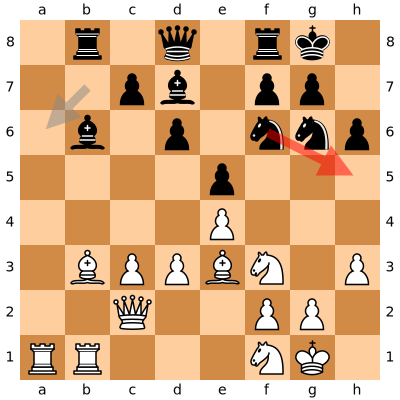

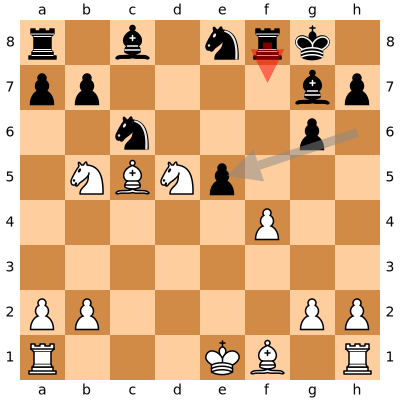

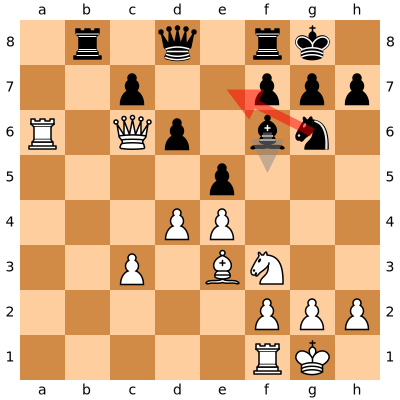

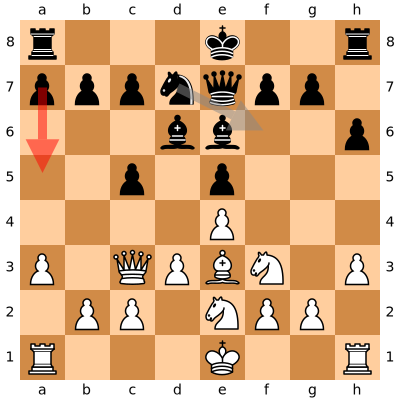

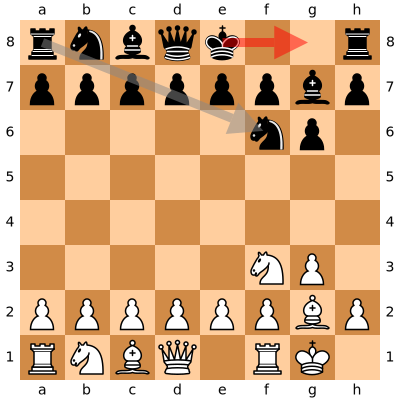

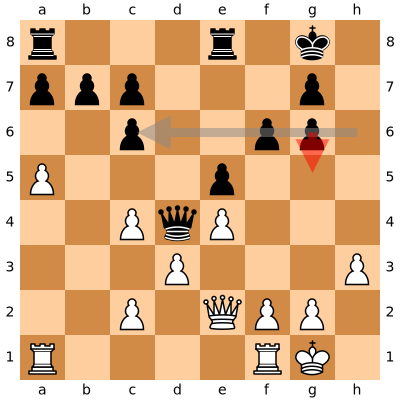

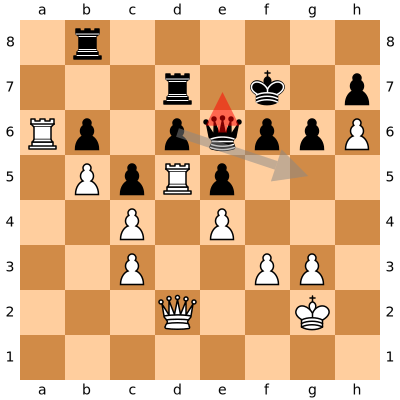

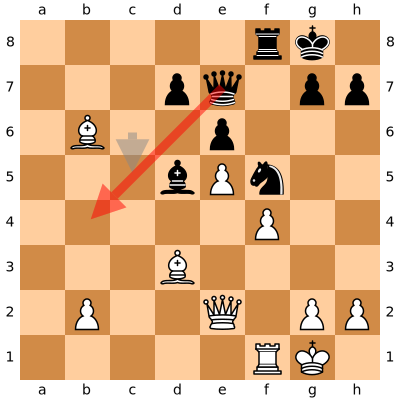

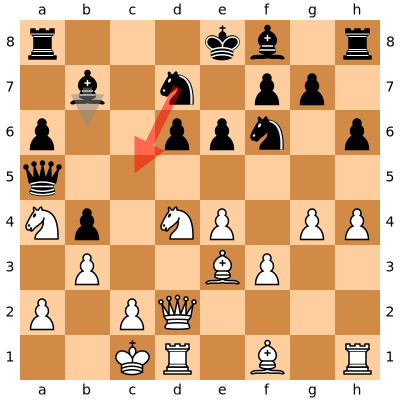

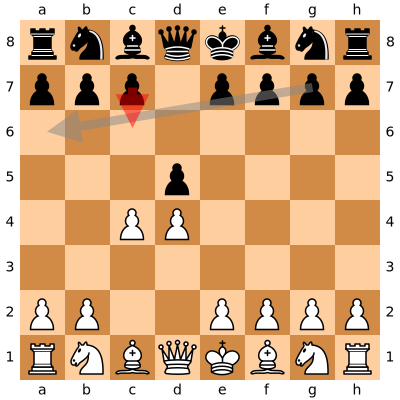

In [56]:
for i in range(10):
    teste = X_train.sample(1)
    testeid = teste.index
    testeans = y_train.iloc[testeid]

    p = drawPredTrain(teste, testeans)

# Referências

- [Download PGN Files](http://www.pgnmentor.com/files.html#players)